**Step 1 : Importing Libraries and Data**

In [1]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing dataset to csv

lead=pd.read_csv("Leads.csv")


**Step 2: Inspecting the Dataframe**

In [4]:
#Let's see the head of our dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape

(9240, 37)

In [6]:
#Let's check out info of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**we can see few catogorical values for which we can create dummy values and also null values for few columns we should treat futher** 

**Exploratory Data Analysis**

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

**there are few columns with data select these are as good as missing values hence we can consider as NaN**

In [8]:
#Replacing 'Select' values with Nan
lead=lead.replace("Select", np.nan)

In [9]:
#Checking for count of missing values in each column
lead.isnull().sum()/100

Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.37
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.37
Last Activity                                     1.03
Country                                          24.61
Specialization                                   33.80
How did you hear about X Education               72.50
What is your current occupation                  26.90
What matters most to you in choosing a course    27.09
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**we can see many columns are having more than 35% null values we can ignore those columns**

In [10]:
#Drop all the columns with more than 45% missing values
cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 35):
        lead.drop(i, axis=1, inplace = True)

In [46]:
lead.isnull().sum()/100

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.37
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.37
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    27.09
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**3.3 Categorical Attributes Analysis:**

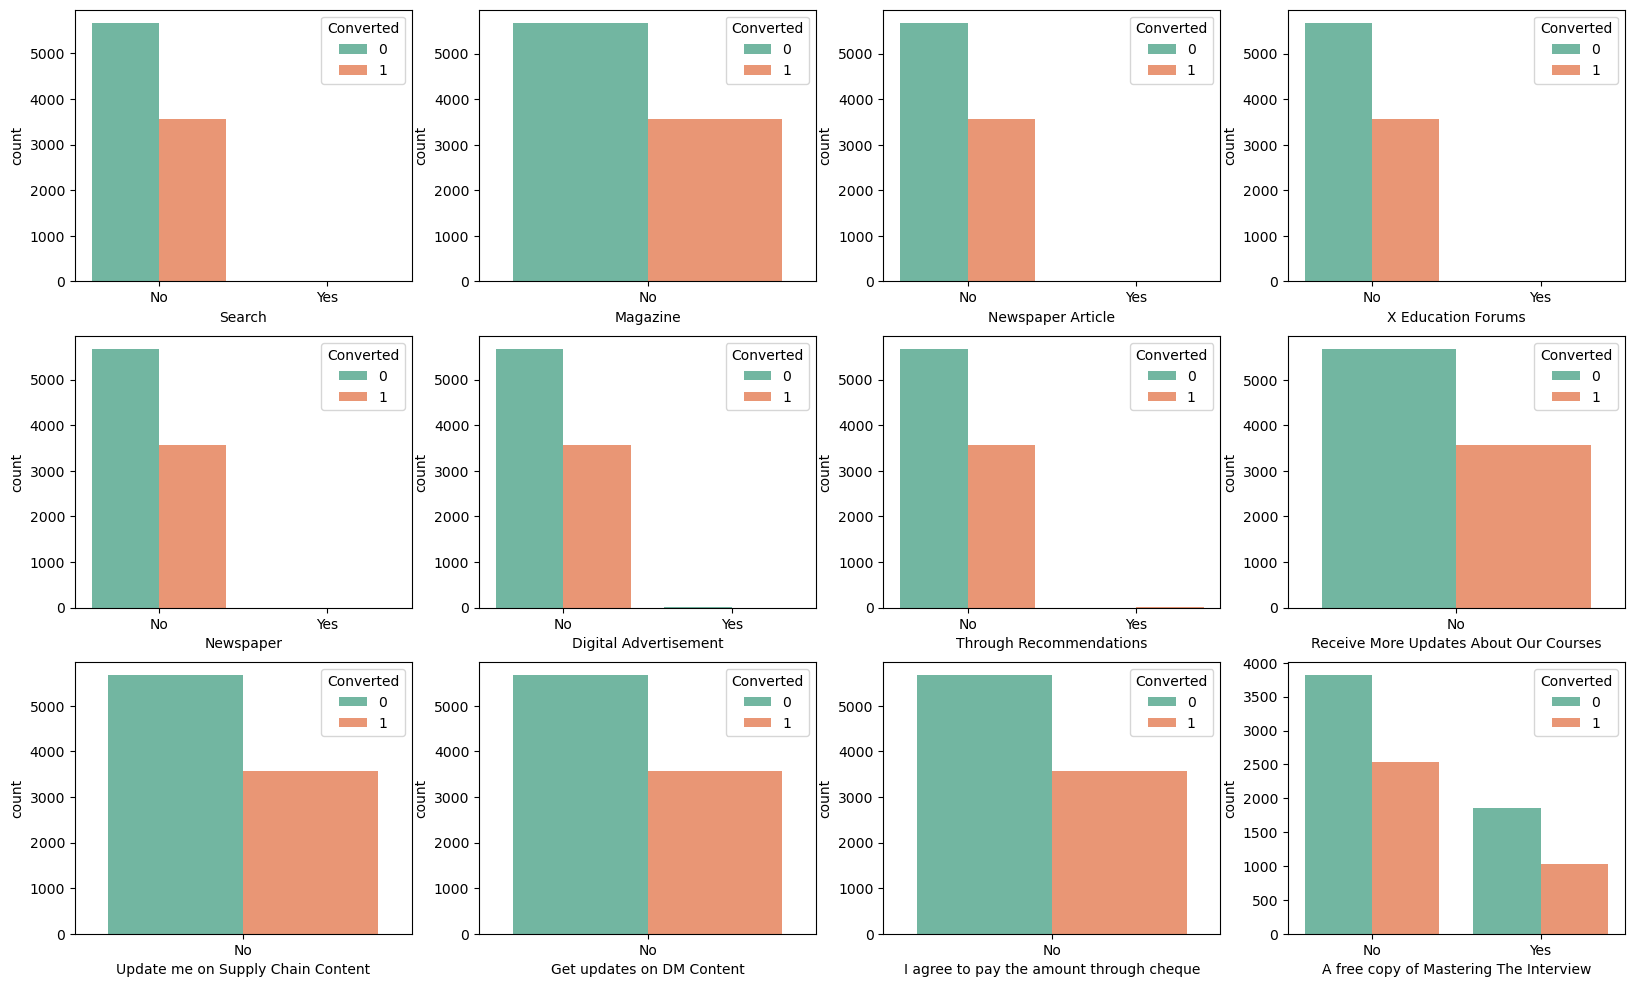

In [12]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = lead, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = lead, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead, ax = axs[2,3],palette = 'Set2')
plt.show()

Inference

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them

In [13]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [14]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

**Google is having highest lead source hence we can impute null values with Google**

In [15]:
#replacing Nan Value with Google
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')

In [16]:
#combining low frequency values to Others 

lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

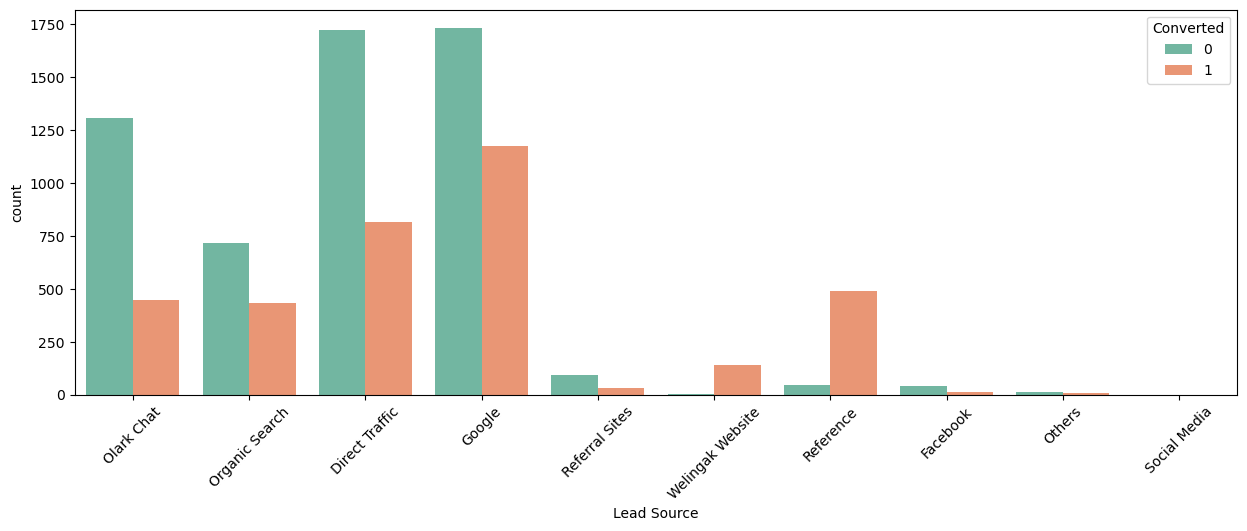

In [17]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

**Inference** 

Maximum Leads are generated by Google and Direct Traffic .

In [18]:
#checking value counts of Country column

lead['Country'].value_counts(dropna=False)


Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

**since missing values are high we can consider missing values are not provided**

In [19]:
#replacing Nan Value with Google
lead['Country'] = lead['Country'].replace(np.nan,'not provided')

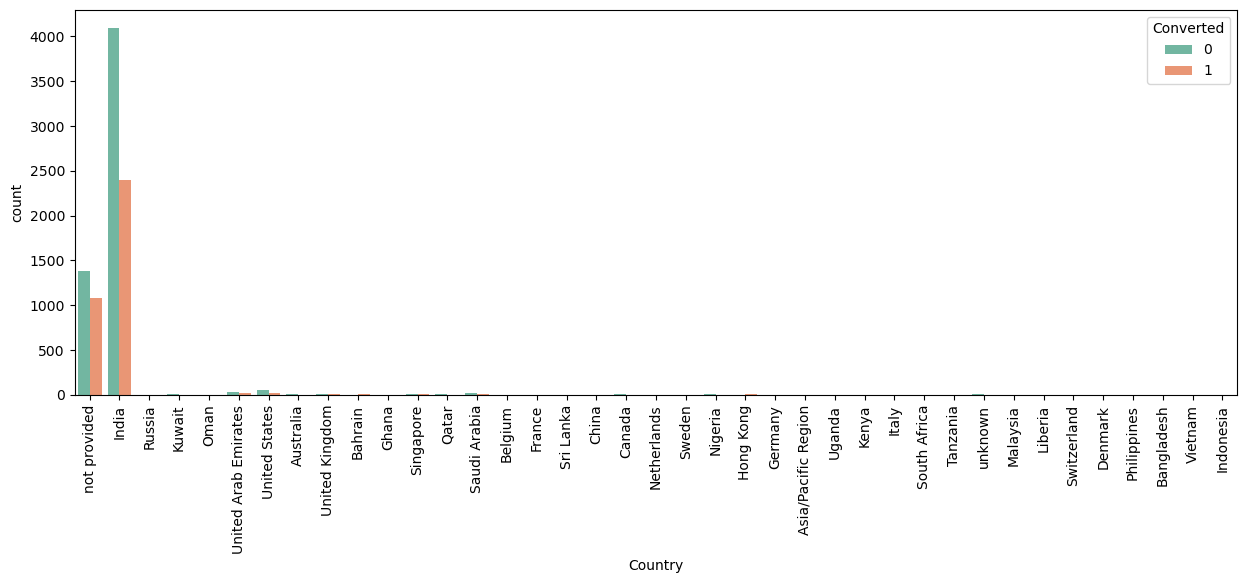

In [20]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Since most of the count are in India and not provided we can drop this column**

In [21]:
#appending the column to the dropping list of columns 

cols_to_drop.append('Country')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [22]:
#checking value counts of 'What is your current occupation' column
lead['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

**Since there are more rows with NaN we can consider that as not provided**

In [23]:
#Creating new category 'Not provided'

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Not provided')

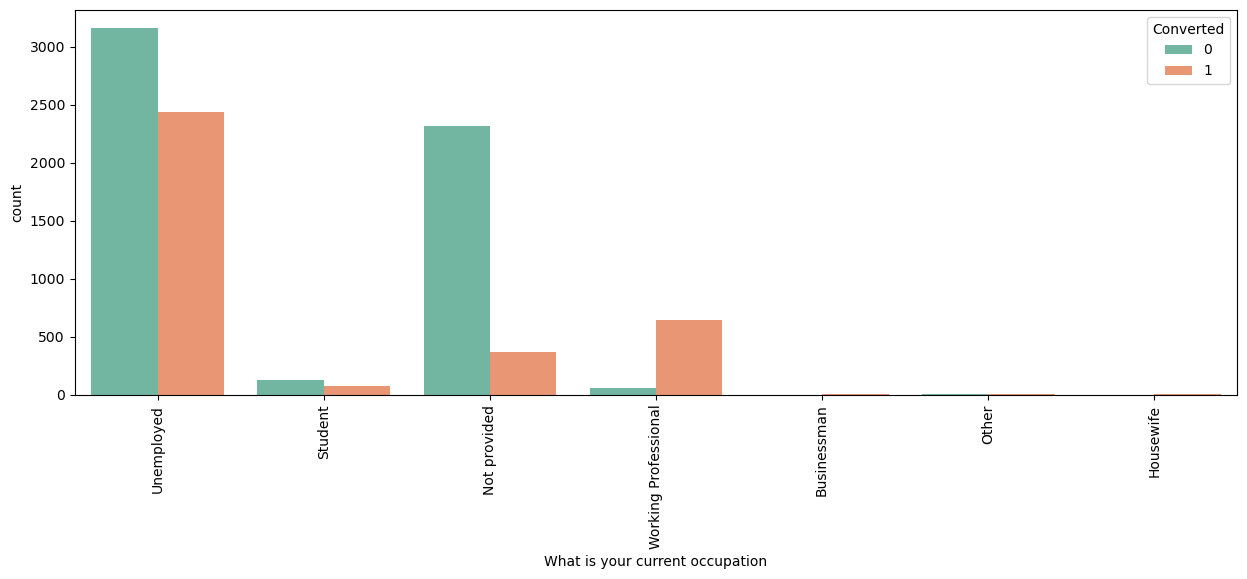

In [24]:
# Visualizing current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What is your current occupation', hue='Converted' , data =lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Inference**

Maximum leads generated are unemployed and their conversion rate is more than 50%.
Conversion rate of working professionals is very high.

In [25]:
#checking value counts of 'What matters most to you in choosing a course'

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

**clearly as most of the data is better career prospects and NaN we can ignore this column**

In [26]:
## appending What matters most to you in choosing a course to cols_to_drop 
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [27]:
#checking value counts of Last Activity
lead['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

**missing values can be replaced with mean value Email Opened**

In [28]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Email Opened')

In [29]:
#combining low frequency values to others
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

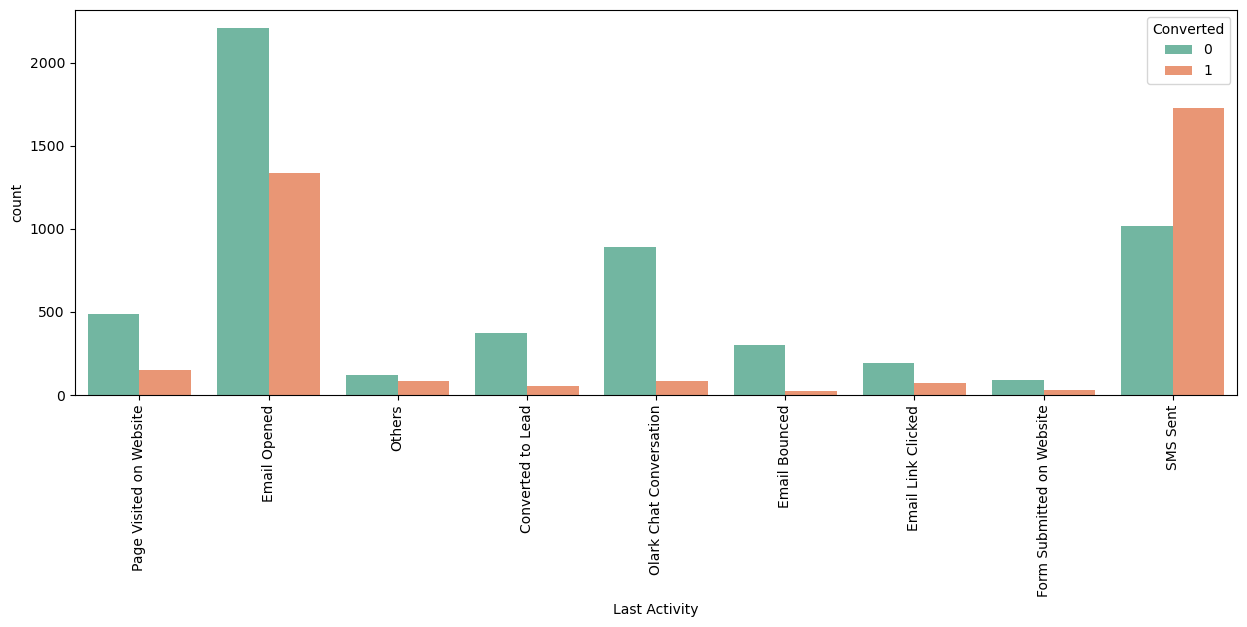

In [30]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Inference**

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.  
SMS sent as last acitivity has high conversion rate.

In [31]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [32]:
#Check the Null Values in All Columns after imputation:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [33]:
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

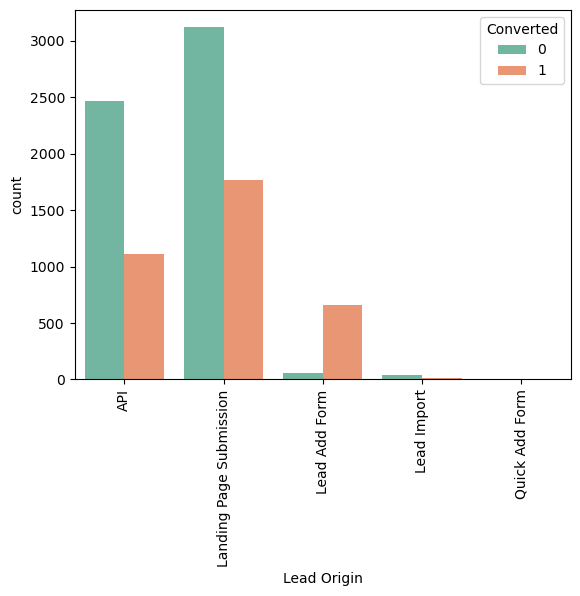

In [34]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

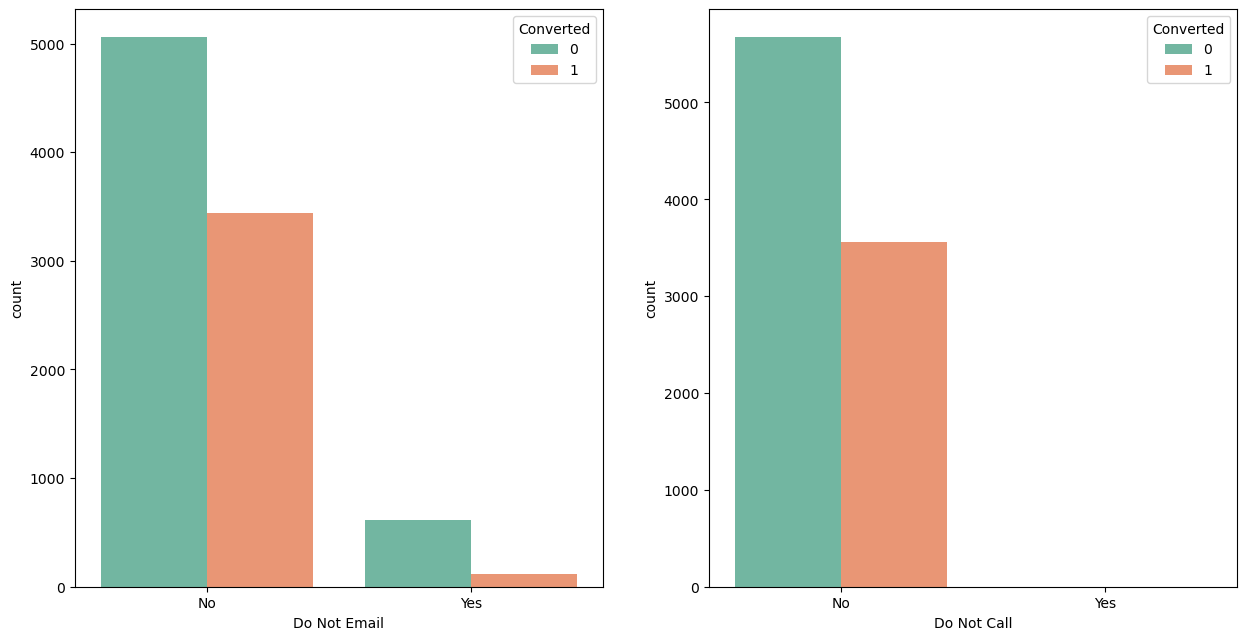

In [35]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1],palette = 'Set2')
plt.show()

**We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed**

In [36]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

In [37]:
#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [38]:
#clubbing lower frequency values to others

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

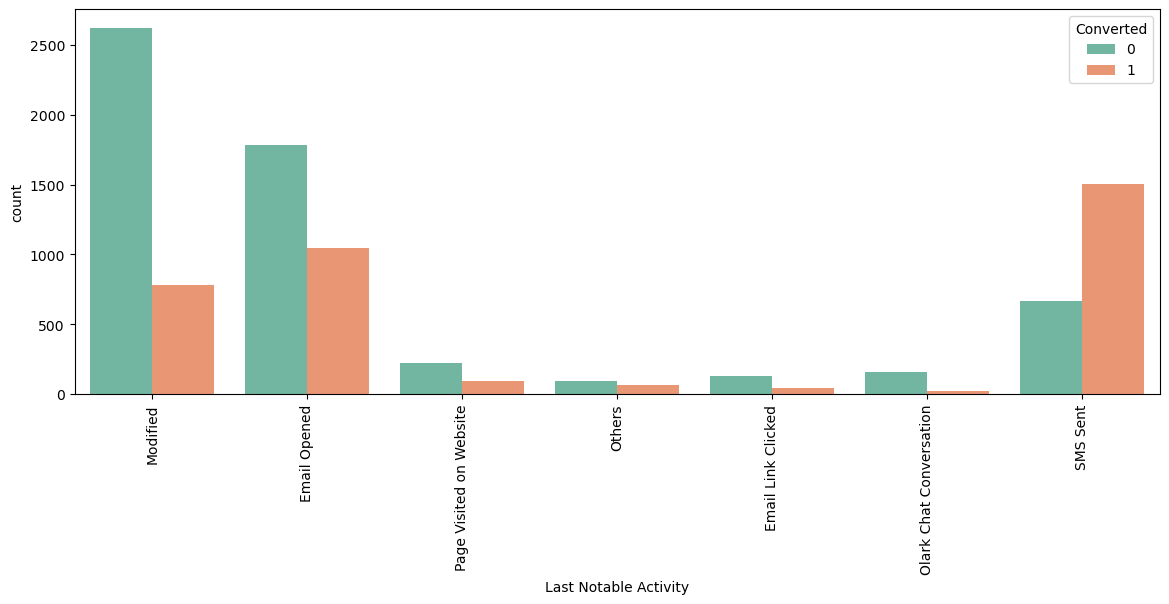

In [39]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

**Inference**

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.   
SMS sent as last acitivity has high conversion rate.  
Maximum leads are for Modified 

In [40]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [41]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [42]:
#dropping columns
leads = lead.drop(cols_to_drop,axis=1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


In [43]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


**Numerical Attributes Analysis:**

In [50]:
leads.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

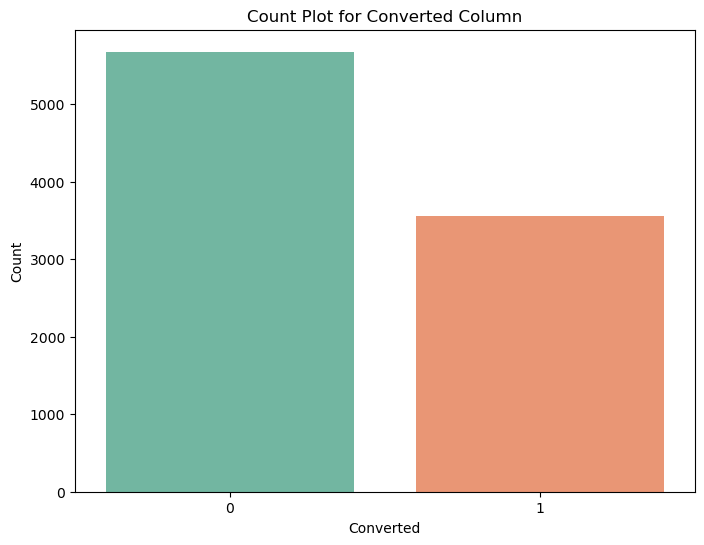

In [52]:
# Create a count plot for the 'Converted' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(x='Converted', data=leads, palette='Set2')

# Add title and labels
plt.title('Count Plot for Converted Column')
plt.xlabel('Converted')
plt.ylabel('Count')

# Show plot
plt.show()

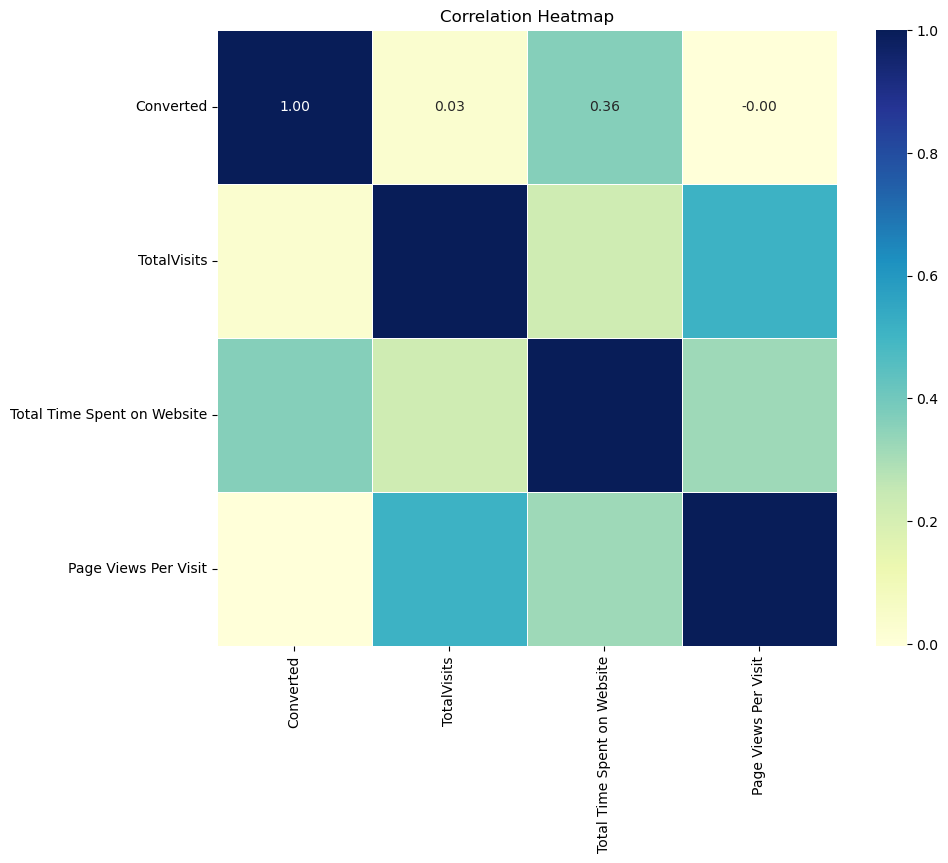

In [60]:
# Select only the numeric columns
numeric_cols = leads.select_dtypes(include=[float, int]).columns
numeric_cols = numeric_cols.fillna(0)
corr_matrix = leads[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
#sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})
# Add title and labels for better readability
plt.title('Correlation Heatmap')
plt.show()

In [58]:
leads.isnull().sum()

Lead Origin                          0
Lead Source                          0
Do Not Email                         0
Converted                            0
TotalVisits                        137
Total Time Spent on Website          0
Page Views Per Visit               137
What is your current occupation      0
dtype: int64

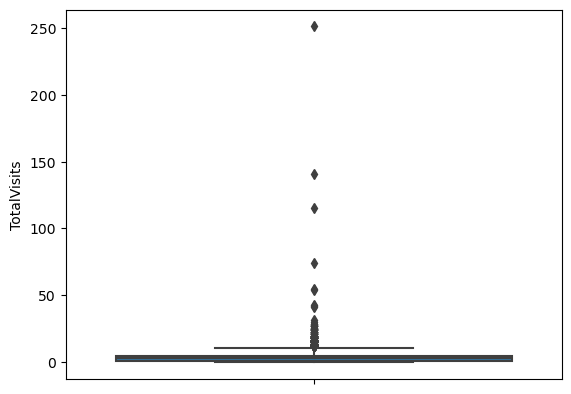

In [61]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits']) 
plt.show()

In [62]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

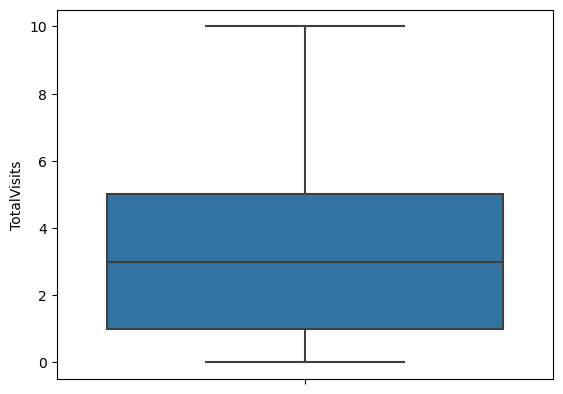

In [63]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

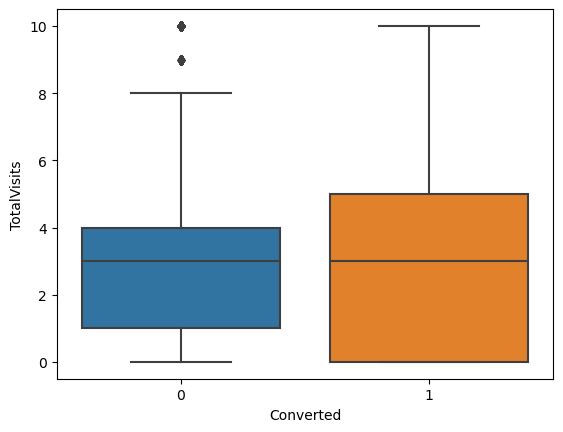

In [64]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

**Inference**
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [65]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

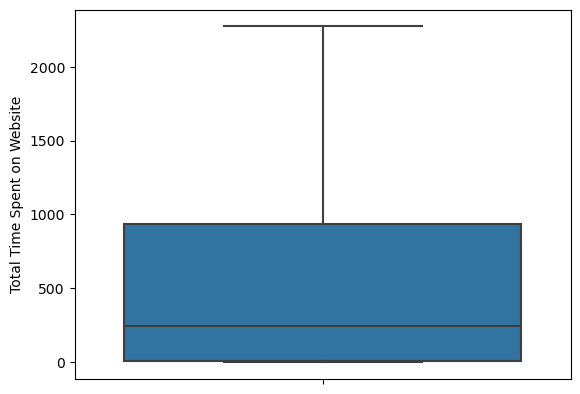

In [66]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

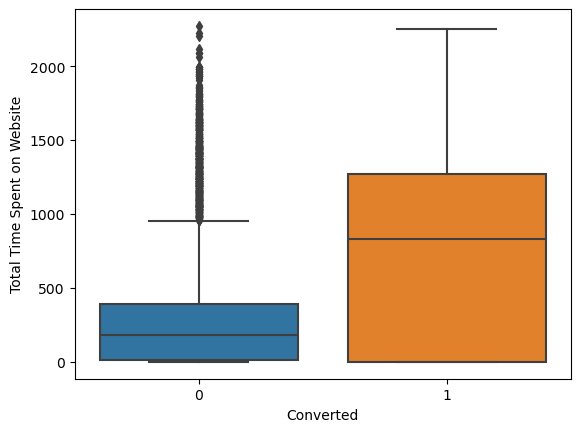

In [67]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

**Inference**
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

In [68]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

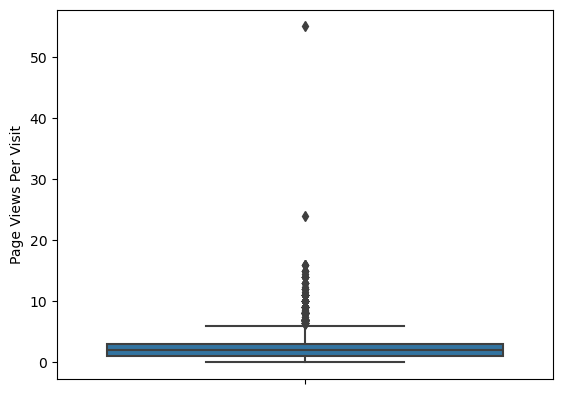

In [69]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

**Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable**

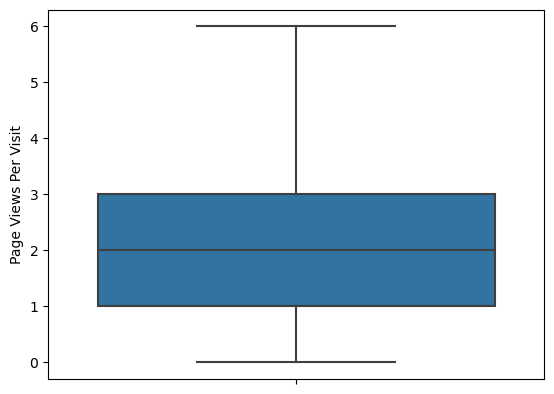

In [71]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

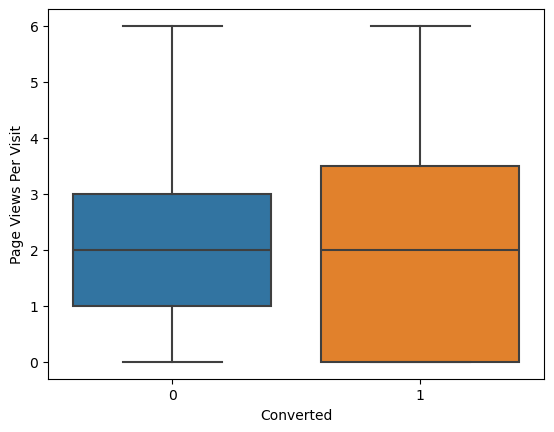

In [72]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

**Inference**  
Median for converted and not converted leads is almost same.  
Nothing conclusive can be said on the basis of Page Views Per Visit.  

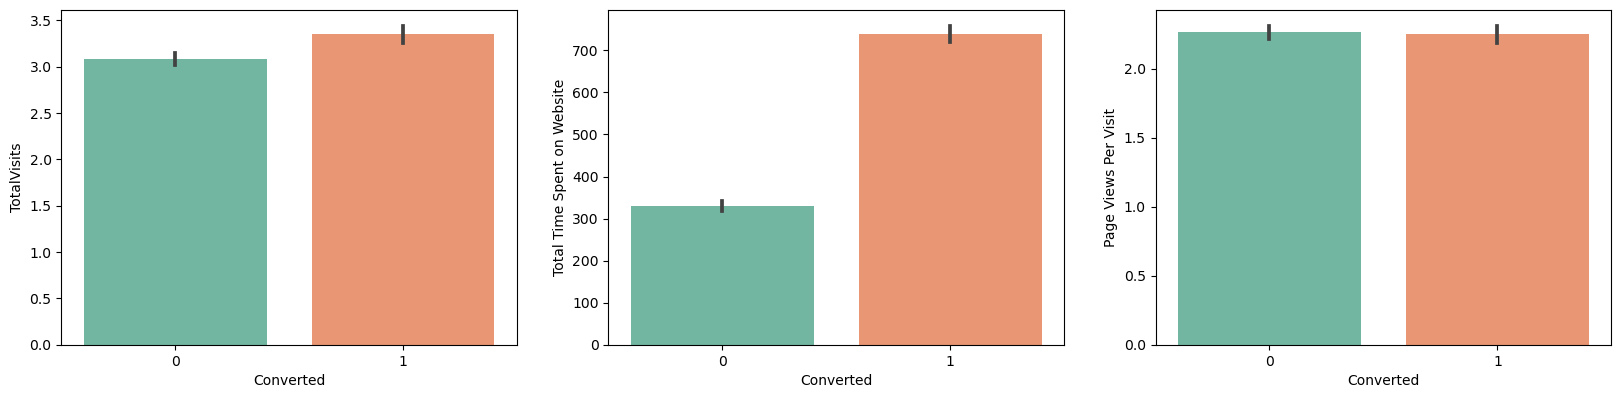

In [73]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

**Inference**  
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

**Data Preparation**  
Converting some binary variables (Yes/No) to 0/1

In [74]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [75]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


**Dummy Variable Creation:**

In [76]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [79]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],axis=1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)



In [81]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,axis=1,inplace = True)

In [82]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_Landing Page Submission,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,1,2.0,1532,2.0,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1.0,305,1.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,1,2.0,1428,1.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [106]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   bool   
 6   Lead Origin_Lead Add Form                             9240 non-null   bool   
 7   Lead Origin_Lead Import                               9240 non-null   bool   
 8   Lead Origin_Quick Add Form                            9240

In [154]:
#filling with mean value
leads['TotalVisits']=leads['TotalVisits'].fillna(3.18)

In [157]:
#Filling with mean value
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(2.25)

In [158]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   bool   
 6   Lead Origin_Lead Add Form                             9240 non-null   bool   
 7   Lead Origin_Lead Import                               9240 non-null   bool   
 8   Lead Origin_Quick Add Form                            9240

In [183]:
leads_m=leads

In [187]:

leads_m=leads_m.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [188]:
leads_m.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_Landing Page Submission,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**Test-Train Split**

In [189]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [190]:
# Putting feature variable to X
X=leads_m.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
# Putting response variable to y
y = leads_m['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [192]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Feature Scaling**

In [193]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [194]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-1.150732,-0.885371,-1.269023,-1.057954,-0.293817,-0.071611,-0.012435,-1.057954,-0.293817,...,-0.25331,-0.120121,-0.017587,-0.119457,-0.030471,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
6795,-0.291638,0.298733,0.005716,-0.518675,0.945221,-0.293817,-0.071611,-0.012435,0.945221,-0.293817,...,-0.25331,-0.120121,-0.017587,-0.119457,-0.030471,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
3516,-0.291638,0.661099,-0.691418,0.141406,-1.057954,-0.293817,-0.071611,-0.012435,-1.057954,-0.293817,...,-0.25331,-0.120121,-0.017587,-0.119457,-0.030471,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
8105,-0.291638,0.661099,1.365219,1.551834,0.945221,-0.293817,-0.071611,-0.012435,0.945221,-0.293817,...,-0.25331,-0.120121,-0.017587,-0.119457,-0.030471,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
3934,-0.291638,-1.150732,-0.885371,-1.269023,-1.057954,-0.293817,-0.071611,-0.012435,-1.057954,-0.293817,...,-0.25331,-0.120121,-0.017587,-0.119457,-0.030471,-0.037328,-0.035191,-0.146554,0.807793,-0.290075


In [195]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   float64
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   float64
 3   Page Views Per Visit                                  6468 non-null   float64
 4   Lead Origin_Landing Page Submission                   6468 non-null   float64
 5   Lead Origin_Lead Add Form                             6468 non-null   float64
 6   Lead Origin_Lead Import                               6468 non-null   float64
 7   Lead Origin_Quick Add Form                            6468 non-null   float64
 8   Lead Origin_Landing Page Submission                   6468 n

In [196]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

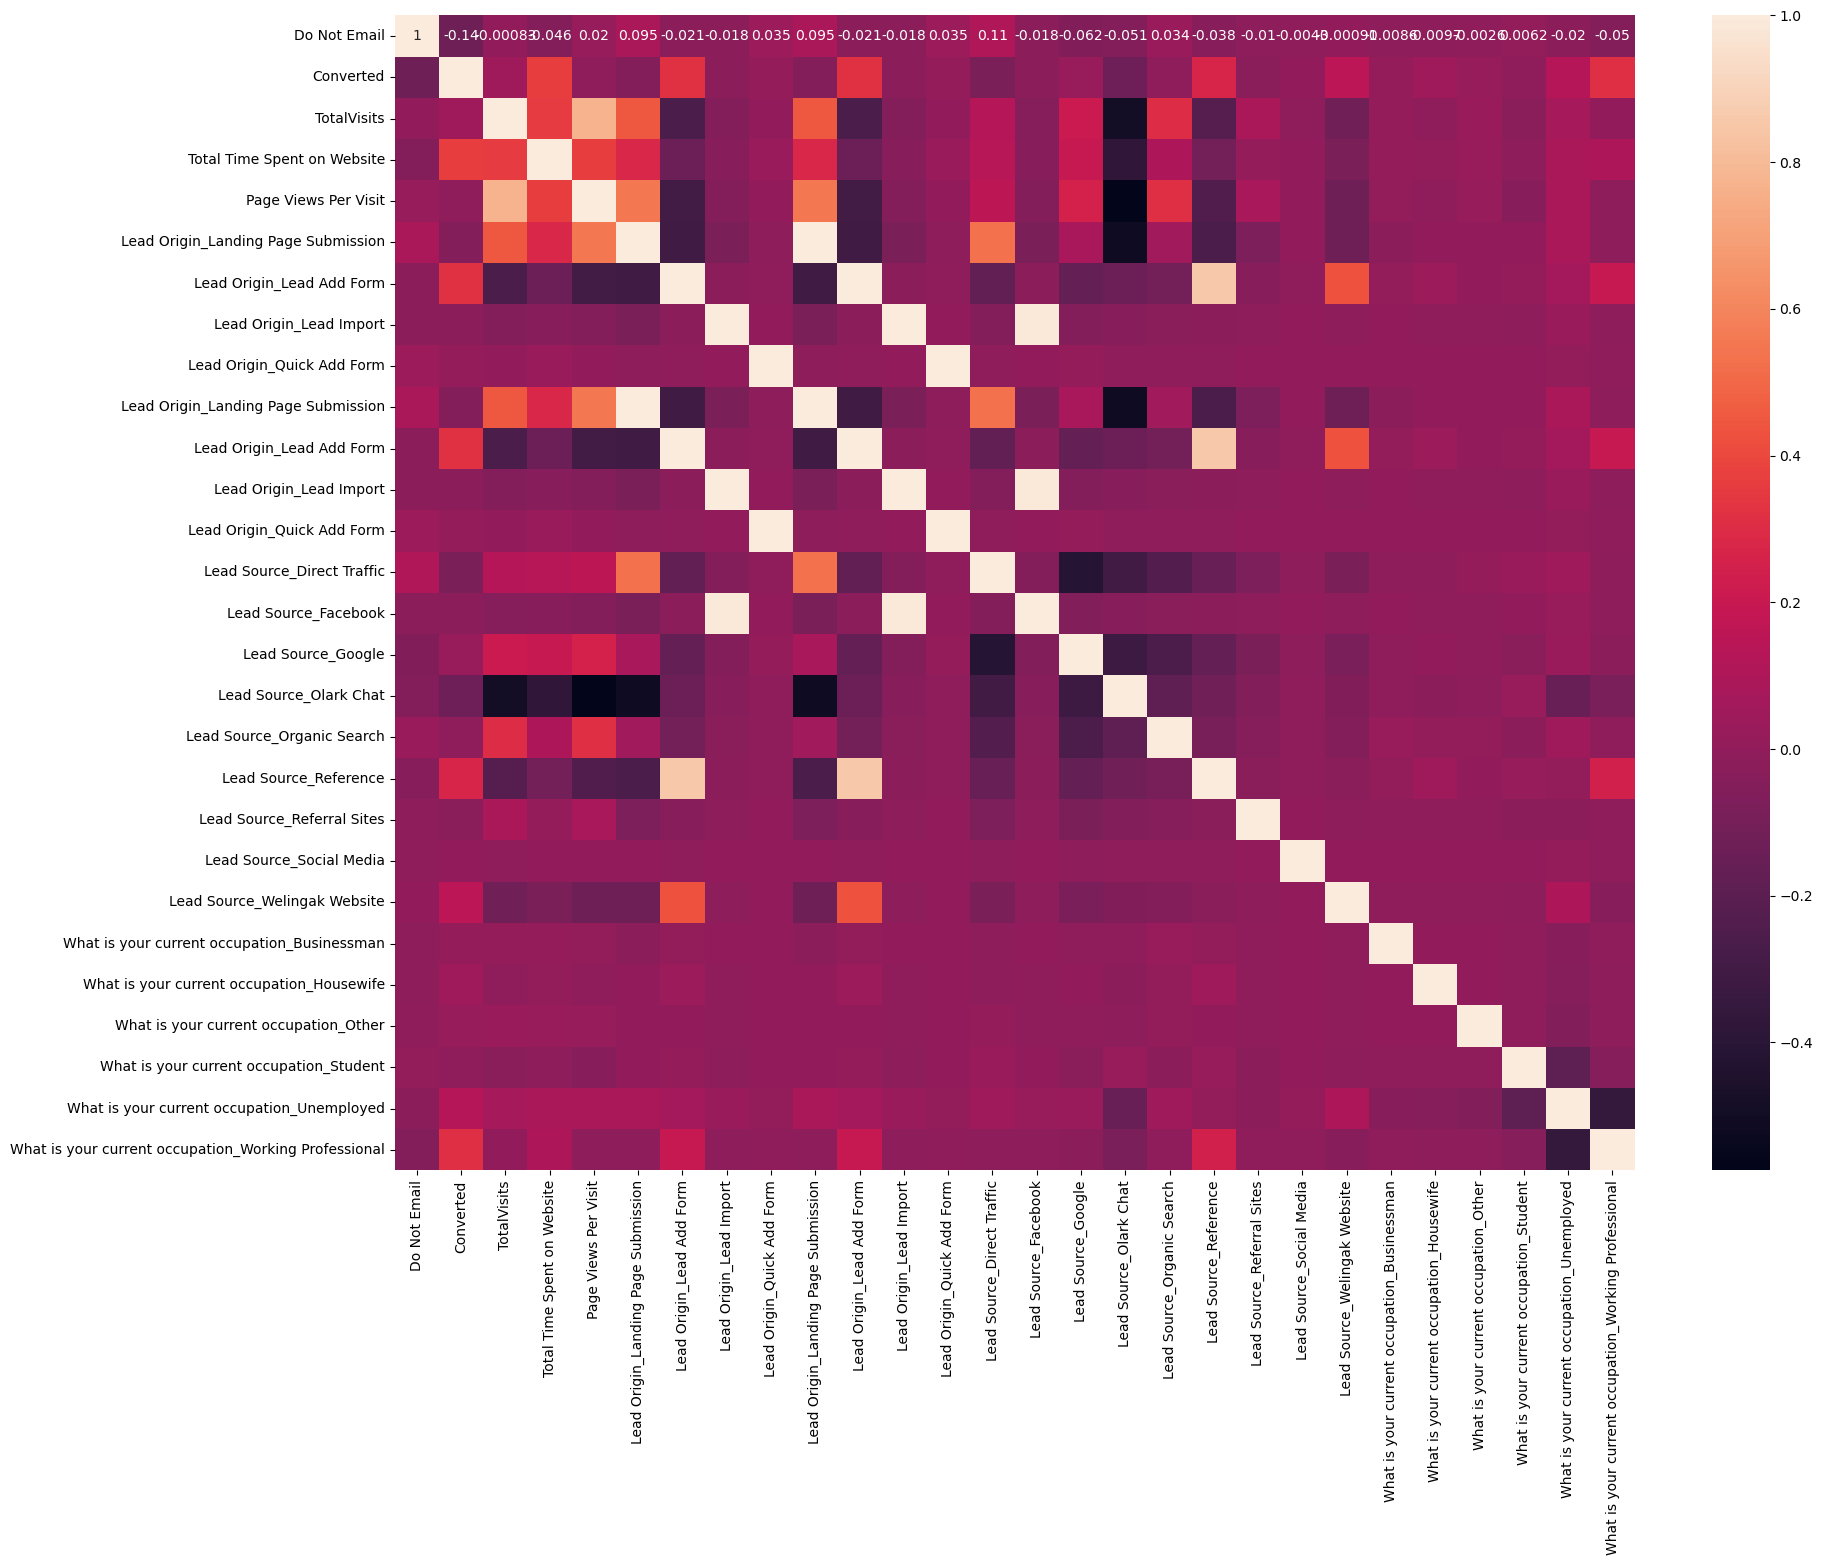

In [197]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()


**Dropping highly correlated dummy variables**.   
we can clearly see Lead Source_Olark Chat have highly correlated with dark in color so we can drop that column

In [198]:
X_test = X_test.drop(['Lead Source_Olark Chat'],axis=1)

In [199]:
X_train = X_train.drop(['Lead Source_Olark Chat'],axis=1)

In [209]:
X_train = X_train.drop(['Lead Origin_Lead Add Form'],axis=1)
X_test = X_test.drop(['Lead Origin_Lead Add Form'],axis=1)

**Model Building using Stats Model & RFE**

In [210]:
# importing necessary library
import statsmodels.api as sm

In [211]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
#rfe = RFE(logreg,15)             
rfe = RFE(estimator=logreg, n_features_to_select=15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [212]:
rfe.support_

array([ True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True])

In [213]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', False, 6),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 7),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', Tru

In [214]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [215]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Social Media',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other'],
      dtype='object')

**Model1**

In [216]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.5
Date:                Sun, 16 Jun 2024   Deviance:                       5795.1
Time:                        19:14:00   Pearson chi2:                 7.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3517
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5232     19.199     -0.027      0.978     -38.152      37.106
Do Not Email                                            -0.3162      0.042     -7.484      0.000      -0.399      -0.233
TotalVisits                                              0.2658      0.050      5.333      0.000       0.168       0.363
Total Time Spent on Website                              1.0658      0.038     28.127      0.000       0.992       1.140
Page Views Per Visit                                    -0.1987      0.055     -3.581      0.000      -0.307      -0.090
Lead Source_Direct Traffic                              -0.5342      0.056     -9.558      0.000      -0.644      -0.425
Lead Source_Facebook                                    -0.0943      0.037     -2.542      0.011      -0.167      -0.022
Lead Source_Google                                      -0.3678      0.057     -6.441      0.000      -0.480      -0.256
Lead Source_Organic Search                              -0.3271      0.050     -6.484      0.000      -0.426      -0.228
Lead Source_Reference                                    0.6053      0.049     12.421      0.000       0.510       0.701
Lead Source_Referral Sites                              -0.1693      0.038     -4.445      0.000      -0.244      -0.095
Lead Source_Welingak Website                             0.5400      0.085      6.339      0.000       0.373       0.707
What is your current occupation_Housewife                0.8796    514.323      0.002      0.999   -1007.175    1008.934
What is your current occupation_Student                  0.1649      0.032      5.188      0.000       0.103       0.227
What is your current occupation_Unemployed               0.6261      0.040     15.625      0.000       0.548       0.705
What is your current occupation_Working Professional     1.0218      0.051     19.955      0.000       0.921       1.122
========================================================================================================================
"""

**p-value of variable What is your current occupation_Housewife is high, so we can drop it.**

In [218]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

**Model2** 

In [219]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.6
Date:                Sun, 16 Jun 2024   Deviance:                       5815.2
Time:                        19:22:24   Pearson chi2:                 7.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3497
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5471      0.037    -14.979      0.000      -0.619      -0.476
Do Not Email                                            -0.3181      0.042     -7.529      0.000      -0.401      -0.235
TotalVisits                                              0.2620      0.050      5.266      0.000       0.165       0.360
Total Time Spent on Website                              1.0649      0.038     28.153      0.000       0.991       1.139
Page Views Per Visit                                    -0.1978      0.055     -3.572      0.000      -0.306      -0.089
Lead Source_Direct Traffic                              -0.5285      0.056     -9.475      0.000      -0.638      -0.419
Lead Source_Facebook                                    -0.0937      0.037     -2.529      0.011      -0.166      -0.021
Lead Source_Google                                      -0.3610      0.057     -6.336      0.000      -0.473      -0.249
Lead Source_Organic Search                              -0.3211      0.050     -6.380      0.000      -0.420      -0.222
Lead Source_Reference                                    0.6179      0.049     12.691      0.000       0.522       0.713
Lead Source_Referral Sites                              -0.1683      0.038     -4.423      0.000      -0.243      -0.094
Lead Source_Welingak Website                             0.5413      0.085      6.353      0.000       0.374       0.708
What is your current occupation_Student                  0.1610      0.032      5.066      0.000       0.099       0.223
What is your current occupation_Unemployed               0.6124      0.040     15.427      0.000       0.535       0.690
What is your current occupation_Working Professional     1.0141      0.051     19.838      0.000       0.914       1.114
========================================================================================================================
"""

**Since the Model 2 seems to be stable with significant p-values, we shall go ahead with this model for further analysis**. 

**Calculating VIF**

In [220]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Source_Google,3.07
3,Page Views Per Visit,3.01
4,Lead Source_Direct Traffic,2.80
1,TotalVisits,2.51
7,Lead Source_Organic Search,2.42
8,Lead Source_Reference,1.36
13,What is your current occupation_Working Profes...,1.31
12,What is your current occupation_Unemployed,1.29
2,Total Time Spent on Website,1.27
9,Lead Source_Referral Sites,1.17


**All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only**

__Predicting a Train model__

In [221]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.315374
6795    0.313645
3516    0.407853
8105    0.682429
3934    0.315374
4844    0.974846
3297    0.210821
8071    0.993777
987     0.132659
7423    0.834043
dtype: float64

In [222]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31537351, 0.31364517, 0.40785281, 0.68242868, 0.31537351,
       0.97484582, 0.21082116, 0.9937765 , 0.13265852, 0.83404301])

In [223]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.315374,1871
1,0,0.313645,6795
2,0,0.407853,3516
3,0,0.682429,8105
4,0,0.315374,3934


In [224]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.315374,1871,0
1,0,0.313645,6795,0
2,0,0.407853,3516,0
3,0,0.682429,8105,1
4,0,0.315374,3934,0


**Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value**

**confusion matrix** 

In [225]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3592  410]
 [ 897 1569]]


In [226]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7979282622139765


In [227]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6362530413625304

In [229]:
# Let us calculate specificity
TN / float(TN+FP)

0.8975512243878061

In [230]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1024487756121939


In [231]:
# positive predictive value 
print (TP / float(TP+FP))

0.7928246589186457


In [232]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8001782134105592


**PLOTTING ROC CURVE**

**An ROC curve demonstrates several things:**.  

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).  
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.  
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [234]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [235]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


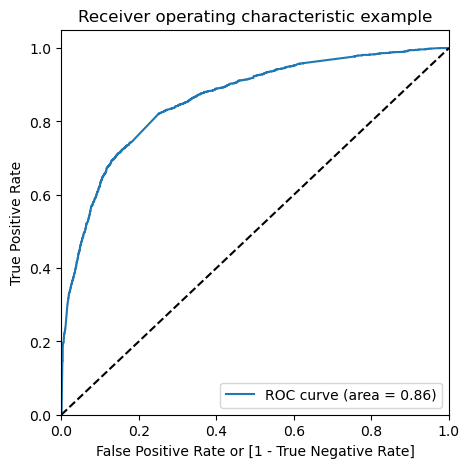

In [236]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.**

**Finding Optimal Cutoff Point**  
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [239]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.315374,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.313645,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.407853,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.682429,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.315374,3934,0,1,1,1,1,0,0,0,0,0,0


In [240]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.511905  0.980535  0.223138
0.2   0.2  0.693414  0.900649  0.565717
0.3   0.3  0.772109  0.825629  0.739130
0.4   0.4  0.800866  0.698297  0.864068
0.5   0.5  0.797928  0.636253  0.897551
0.6   0.6  0.788497  0.577453  0.918541
0.7   0.7  0.769326  0.484996  0.944528
0.8   0.8  0.741033  0.369019  0.970265
0.9   0.9  0.696042  0.213301  0.993503


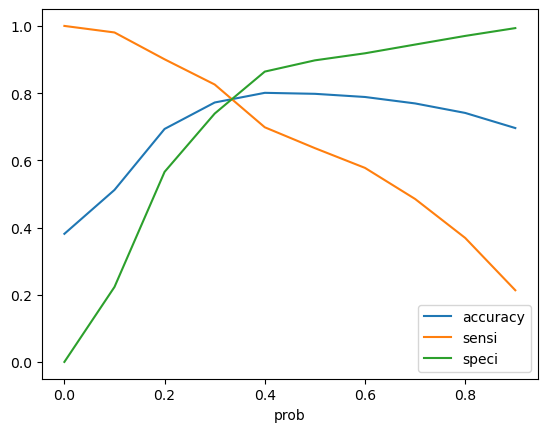

In [241]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**

In [242]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.315374,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.313645,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.407853,3516,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.682429,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.315374,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [243]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.315374,1871,1,32
1,0,0.313645,6795,1,31
2,0,0.407853,3516,1,41
3,0,0.682429,8105,1,68
4,0,0.315374,3934,1,32


In [244]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

final_Predicted
1    2036
0     430
Name: count, dtype: int64

In [245]:
# check the precentage of final_predicted conversions

2036/float(2036+430)

0.8256285482562855

**Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.¶**.  
Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [246]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7721088435374149

In [247]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2958, 1044],
       [ 430, 2036]])

In [248]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [249]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8256285482562855

In [250]:
# Let us calculate specificity
TN / float(TN+FP)

0.7391304347826086

**Inference:**.  
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:   

Accuracy : 77.05%  
Sensitivity :82.89%    
Specificity : 73.49%   
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [251]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2608695652173913


In [252]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6610389610389611


In [253]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8730814639905549


**Precision and Recall** 

In [254]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2958, 1044],
       [ 430, 2036]])

In [255]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6610389610389611

In [256]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8256285482562855

In [257]:
from sklearn.metrics import precision_score, recall_score

In [258]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6610389610389611

In [259]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8256285482562855

__Precision and Recall Trade-off__. 

In [262]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [263]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

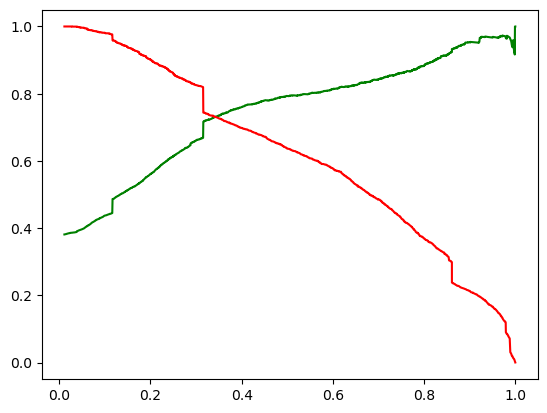

In [264]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Predictions on the test set**

In [265]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,-0.298654,1.737824,0.933036,2.072877,-1.062559,-0.089443,0.0,-1.062559,-0.089443,0.0,...,-0.234082,-0.109764,0.0,-0.136905,-0.02687,-0.018997,-0.053799,-0.165613,-1.245988,-0.28185
2376,-0.298654,-1.156470,-0.900812,-1.271258,-1.062559,-0.089443,0.0,-1.062559,-0.089443,0.0,...,4.272002,-0.109764,0.0,-0.136905,-0.02687,-0.018997,-0.053799,-0.165613,0.802576,-0.28185
7766,-0.298654,0.652464,-0.793792,1.515521,-1.062559,-0.089443,0.0,-1.062559,-0.089443,0.0,...,-0.234082,-0.109764,0.0,-0.136905,-0.02687,-0.018997,-0.053799,-0.165613,-1.245988,3.54799
9199,-0.298654,-1.156470,-0.900812,-1.271258,-1.062559,-0.089443,0.0,-1.062559,-0.089443,0.0,...,-0.234082,-0.109764,0.0,-0.136905,-0.02687,-0.018997,-0.053799,-0.165613,0.802576,-0.28185
4359,-0.298654,-1.156470,-0.900812,-1.271258,-1.062559,-0.089443,0.0,-1.062559,-0.089443,0.0,...,4.272002,-0.109764,0.0,-0.136905,-0.02687,-0.018997,-0.053799,-0.165613,0.802576,-0.28185


In [266]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,-0.298654,1.737824,0.933036,2.072877,1.588155,-0.089443,-0.656003,-0.393089,-0.234082,-0.109764,-0.136905,-0.165613,-1.245988,-0.28185
2376,-0.298654,-1.156470,-0.900812,-1.271258,-0.629661,-0.089443,-0.656003,-0.393089,4.272002,-0.109764,-0.136905,-0.165613,0.802576,-0.28185
7766,-0.298654,0.652464,-0.793792,1.515521,-0.629661,-0.089443,1.524382,-0.393089,-0.234082,-0.109764,-0.136905,-0.165613,-1.245988,3.54799
9199,-0.298654,-1.156470,-0.900812,-1.271258,-0.629661,-0.089443,-0.656003,-0.393089,-0.234082,-0.109764,-0.136905,-0.165613,0.802576,-0.28185
4359,-0.298654,-1.156470,-0.900812,-1.271258,-0.629661,-0.089443,-0.656003,-0.393089,4.272002,-0.109764,-0.136905,-0.165613,0.802576,-0.28185


In [269]:
X_test_sm = sm.add_constant(X_test)

In [270]:
X_test_sm.shape

(2772, 15)

In [271]:
y_test_pred = res.predict(X_test_sm) 

In [272]:
y_test_pred[:10]

4269    0.239223
2376    0.881223
7766    0.750055
9199    0.314313
4359    0.881223
9186    0.382792
1631    0.577457
8963    0.282841
8007    0.099431
5324    0.213421
dtype: float64

In [273]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [274]:
# Let's see the head
y_pred_1.head()

,0
4269,0.239223
2376,0.881223
7766,0.750055
9199,0.314313
4359,0.881223


In [275]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [276]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [277]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [278]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [279]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.239223
1,1,2376,0.881223
2,1,7766,0.750055
3,0,9199,0.314313
4,1,4359,0.881223


In [280]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [281]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.239223
1,1,2376,0.881223
2,1,7766,0.750055
3,0,9199,0.314313
4,1,4359,0.881223


**Assigning Lead Score**

In [282]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [283]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.239223,24
1,2376,1,0.881223,88
2,7766,1,0.750055,75
3,9199,0,0.314313,31
4,4359,1,0.881223,88


In [284]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [285]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.239223,24,0
1,2376,1,0.881223,88,1
2,7766,1,0.750055,75,1
3,9199,0,0.314313,31,1
4,4359,1,0.881223,88,1


In [286]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

final_Predicted
1    916
0    179
Name: count, dtype: int64

In [287]:
# check the precentage of final_predicted conversions on test data

916/float(916+179)

0.8365296803652968

**Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)**.  
Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [289]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7748917748917749

In [290]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1232,  445],
       [ 179,  916]])

In [291]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [292]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8365296803652968

In [293]:
# Let us calculate specificity
TN / float(TN+FP)

0.7346451997614788

**Precision and Recall metrics for the test set**. 

In [294]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6730345334313005

In [295]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8365296803652968

**Inference:**. 
After running the model on the Test Data these are the figures we obtain:  

Accuracy : 77.48%  
Sensitivity :83.65%  
Specificity : 73.46%  

**Conclusion:**. 

While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.  
Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.  
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%  
Hence overall this model seems to be good.  
**Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :**   

Lead Origin_Lead Add Form  
What is your current occupation_Working Professional  
Total Time Spent on Website  